In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
)

In [1]:
df = pd.read_csv("iris/Iris.csv")

# Quick Analysis
print("Head")
print(df.head)
print("------------------------\n")

print("Shape")
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])
print("------------------------\n")

print("Columns")
for col, dtype in zip(df.columns, df.dtypes):
    print(col, " ----- ", dtype)
print("------------------------\n")

Head
<bound method NDFrame.head of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>
------------------------

Shape
Rows:  150
Columns:  6
------------------------

Columns
Id  -----  int64
SepalLengthCm  -----  float64
SepalWidthCm  -----  float64
PetalLengthCm  -----  float64
PetalWidthCm  -----  float64
Species 

In [2]:
# Handling missing values
df.isnull().sum()  # Missing values per column
df.dropna()  # Drop rows with missing values
df.fillna(0)  # Replace missing values with 0

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]

In [3]:
# Analyzing unique values

# print(df["SepalLengthCm"].value_counts())  # Count of unique values
# print(df["SepalLengthCm"].unique())  # Unique values
# print(df["SepalLengthCm"].nunique())  # Number of unique values

for col in df.columns:
    print(col, "---", df[col].nunique())

Id --- 150
SepalLengthCm --- 35
SepalWidthCm --- 23
PetalLengthCm --- 43
PetalWidthCm --- 22
Species --- 3


In [4]:
# Statistical Analysis

print("Summary")
print(df.describe())
print("------------------------\n")

print("Mean")
print(df.mean(numeric_only=True))
print("------------------------\n")

print("Median")
print(df.median(numeric_only=True))
print("------------------------\n")

print("Standard Deviation")
print(df.std(numeric_only=True))
print("------------------------\n")

print("Maximum")
print(df.max(numeric_only=True))
print("------------------------\n")

print("Minimum")
print(df.min(numeric_only=True))
print("------------------------\n")

print("Range")
print(df.max(numeric_only=True) - df.min(numeric_only=True))
print("------------------------\n")

Summary
               Id  SepalLengthCm  ...  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000  ...     150.000000    150.000000
mean    75.500000       5.843333  ...       3.758667      1.198667
std     43.445368       0.828066  ...       1.764420      0.763161
min      1.000000       4.300000  ...       1.000000      0.100000
25%     38.250000       5.100000  ...       1.600000      0.300000
50%     75.500000       5.800000  ...       4.350000      1.300000
75%    112.750000       6.400000  ...       5.100000      1.800000
max    150.000000       7.900000  ...       6.900000      2.500000

[8 rows x 5 columns]
------------------------

Mean
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64
------------------------

Median
Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64
-----------------------

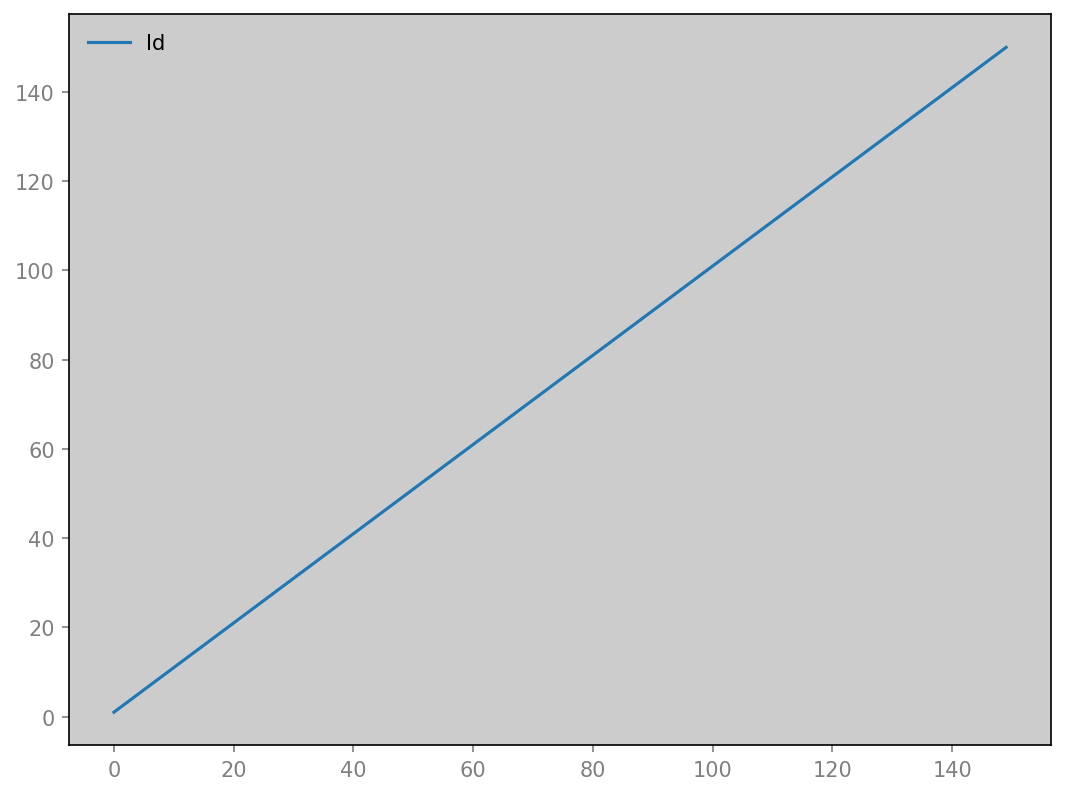

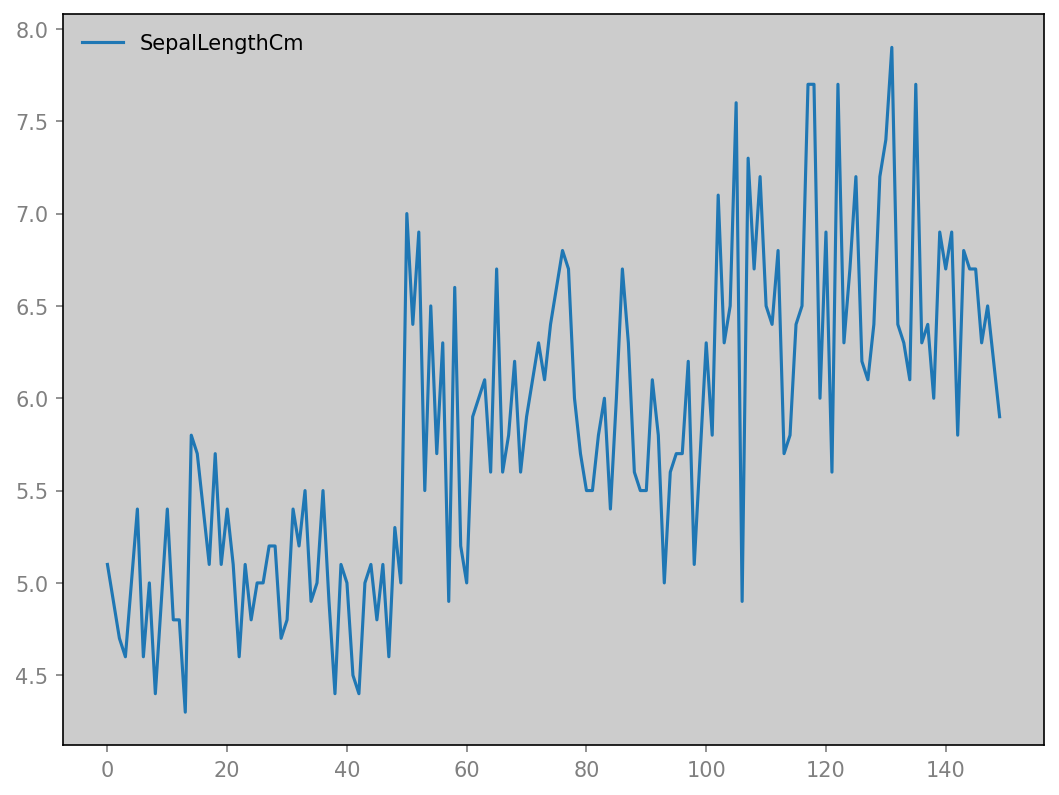

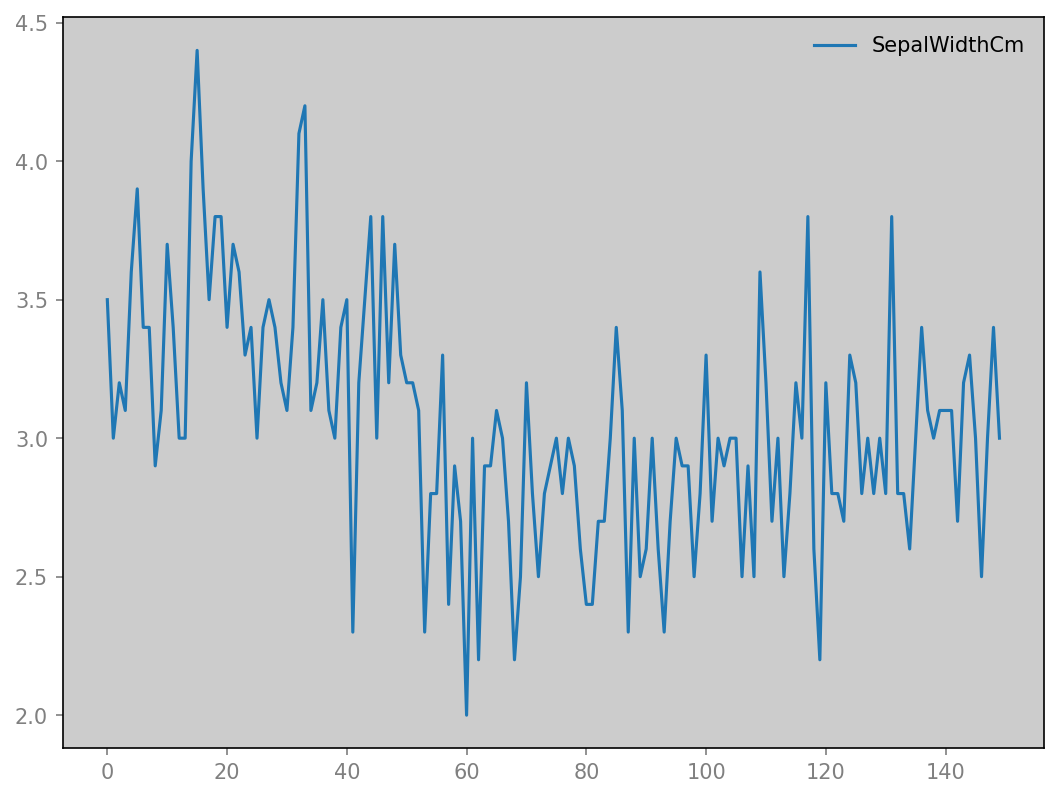

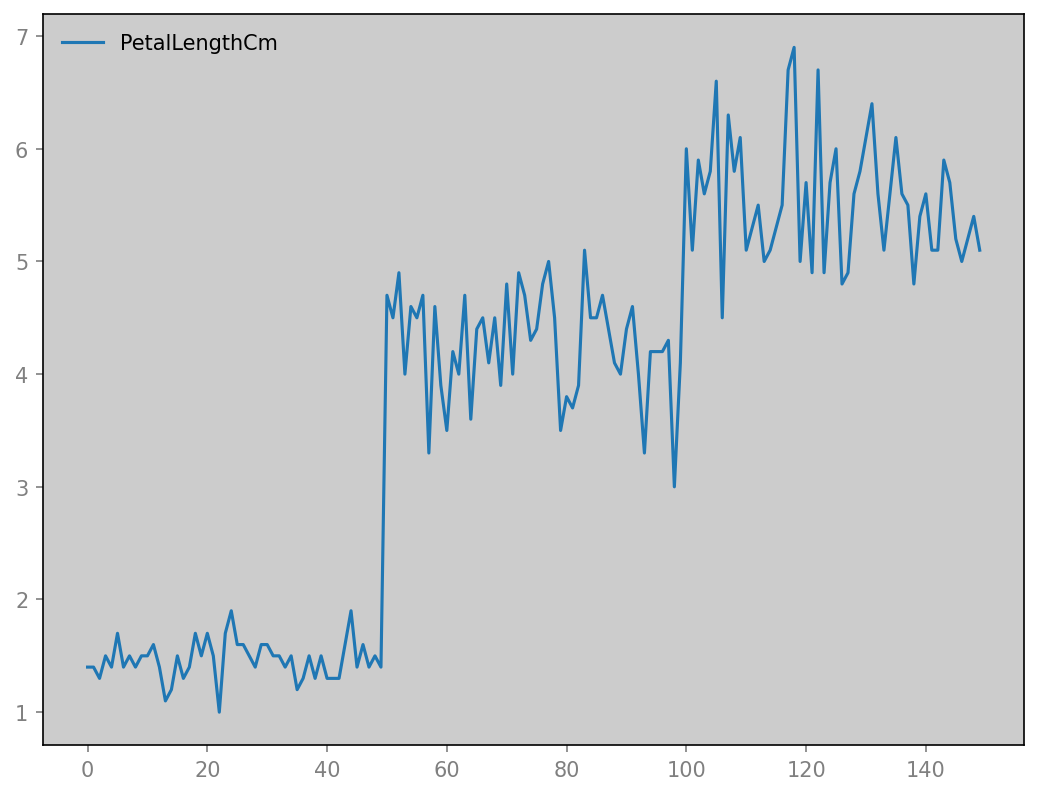

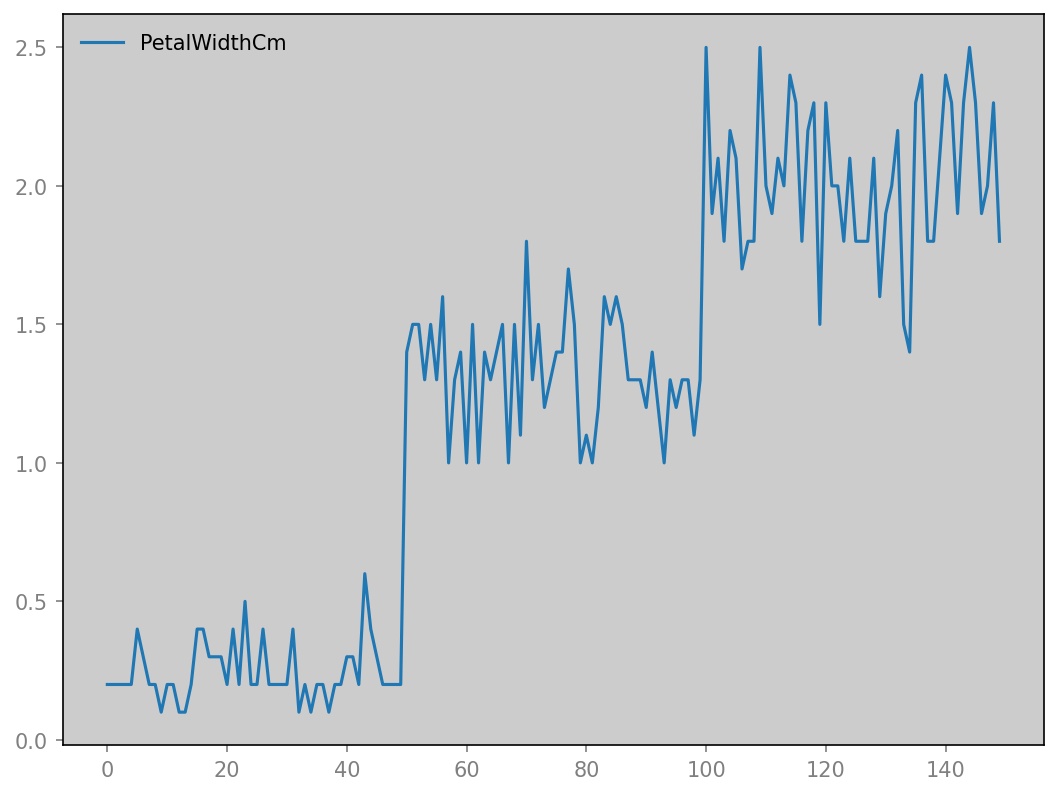

In [5]:
# Basic Plotting

# Excluding non-numeric values, and columns with all NaN
plot_df = df.select_dtypes(include="number").dropna(axis=1, how="all")

for col in plot_df.columns:
    df.plot(y=col)


# print("Box Plot")
# df.boxplot(column=[col for col in plot_df.columns])

Scatter Plots


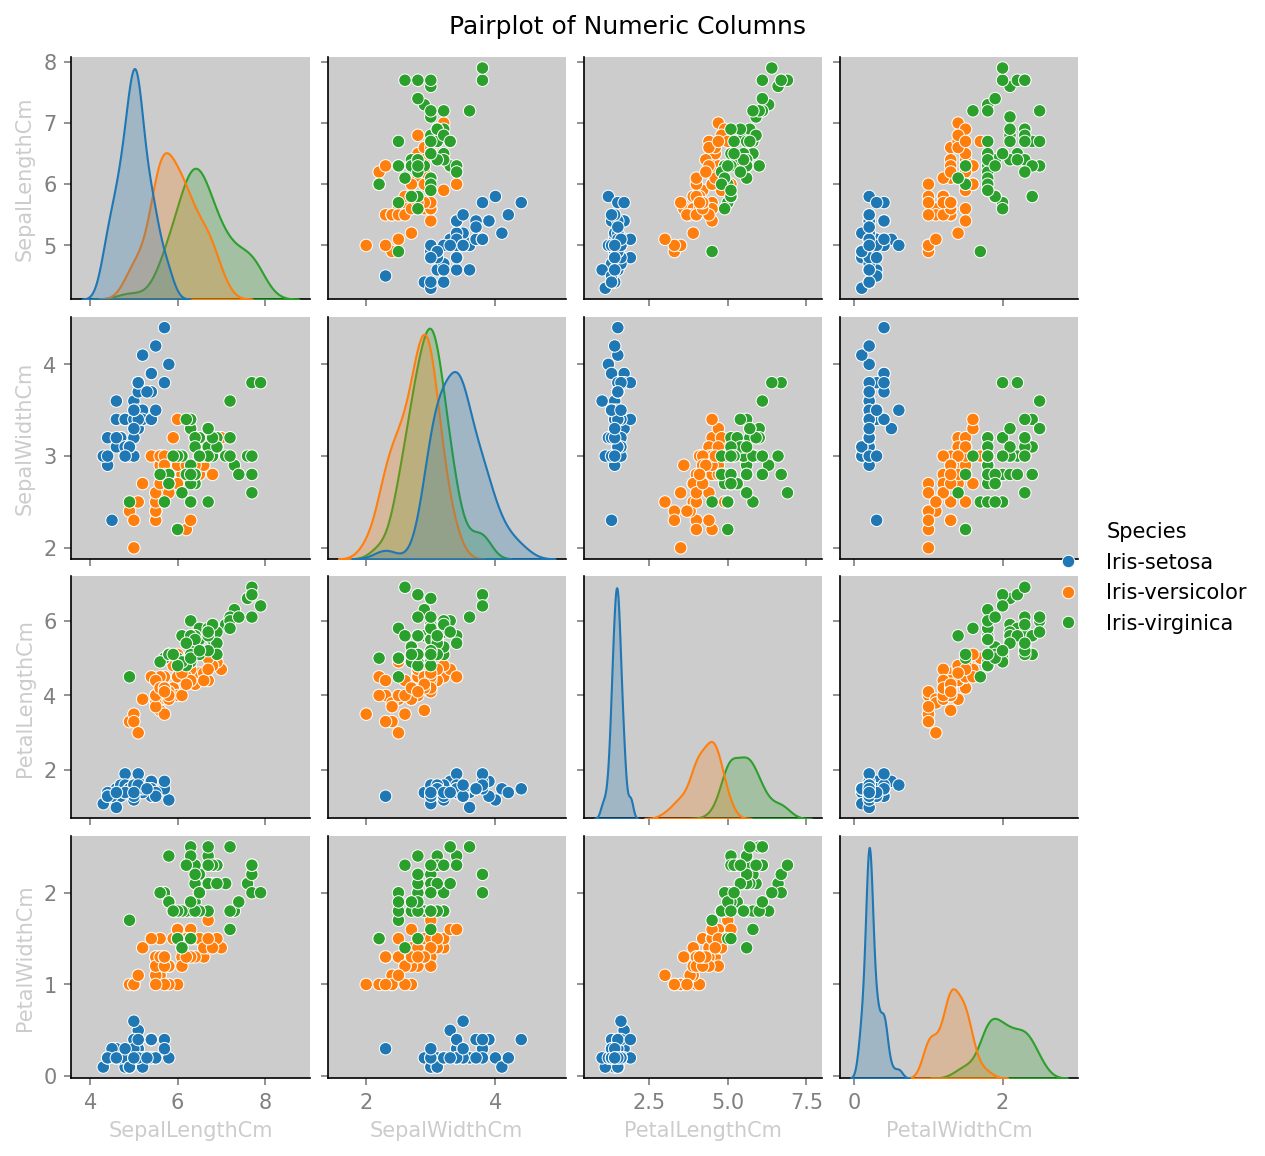

In [6]:
# Scatter plots

print("Scatter Plots")
sns.pairplot(df.drop(columns="Id"), hue="Species")
plt.suptitle("Pairplot of Numeric Columns", y=1.02)
plt.show()

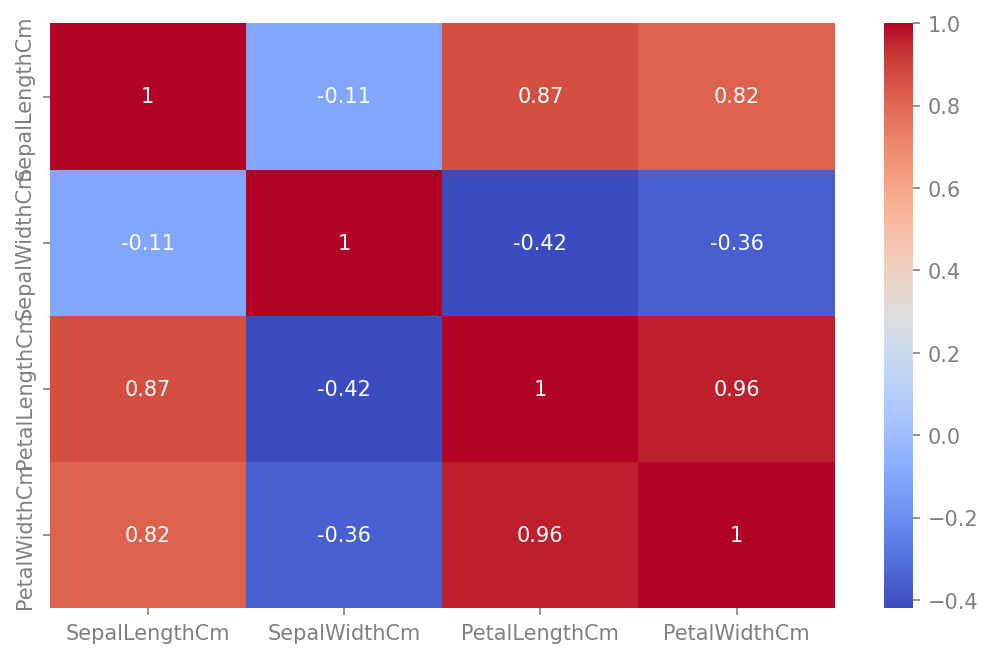

In [7]:
# Correlation Heat Map
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns="Id").corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

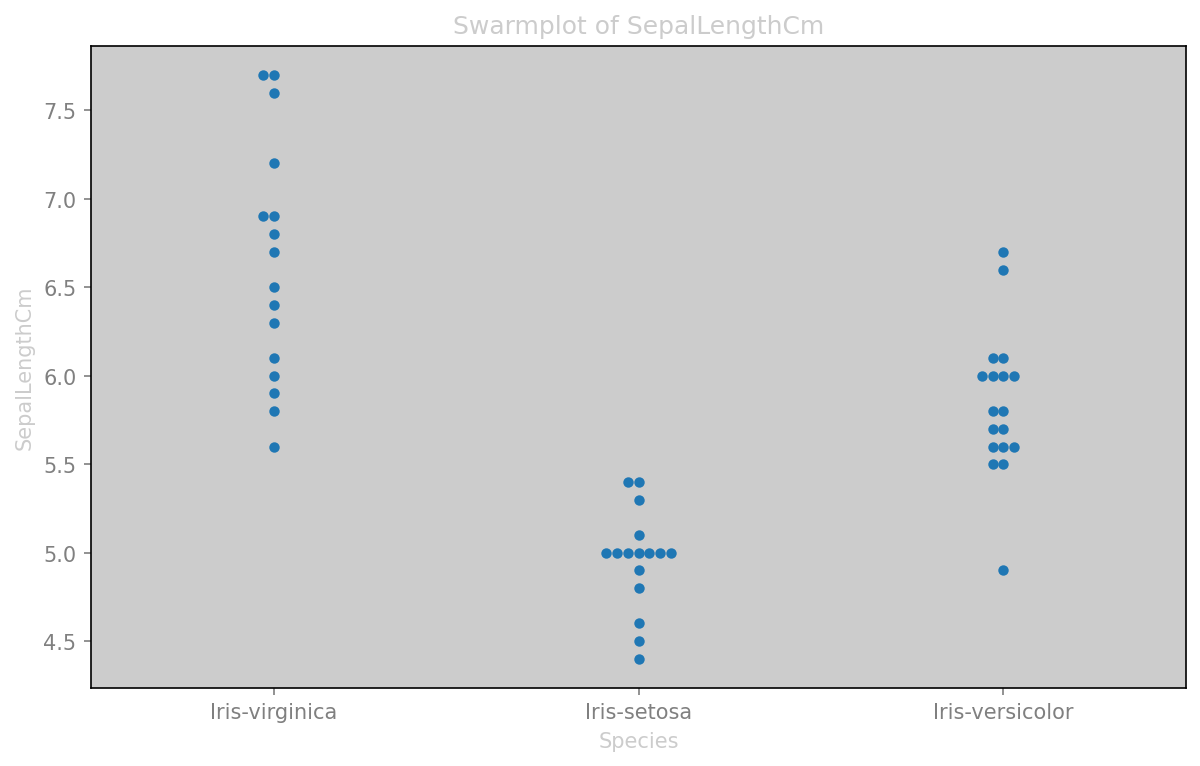

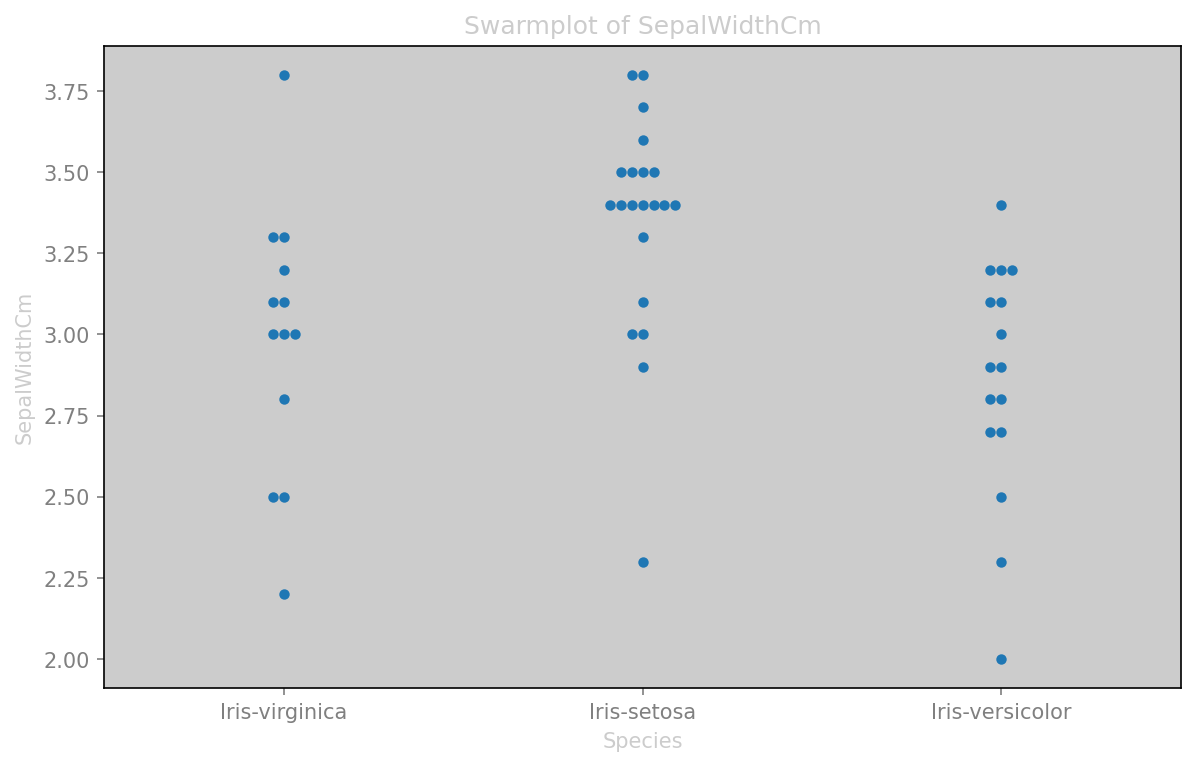

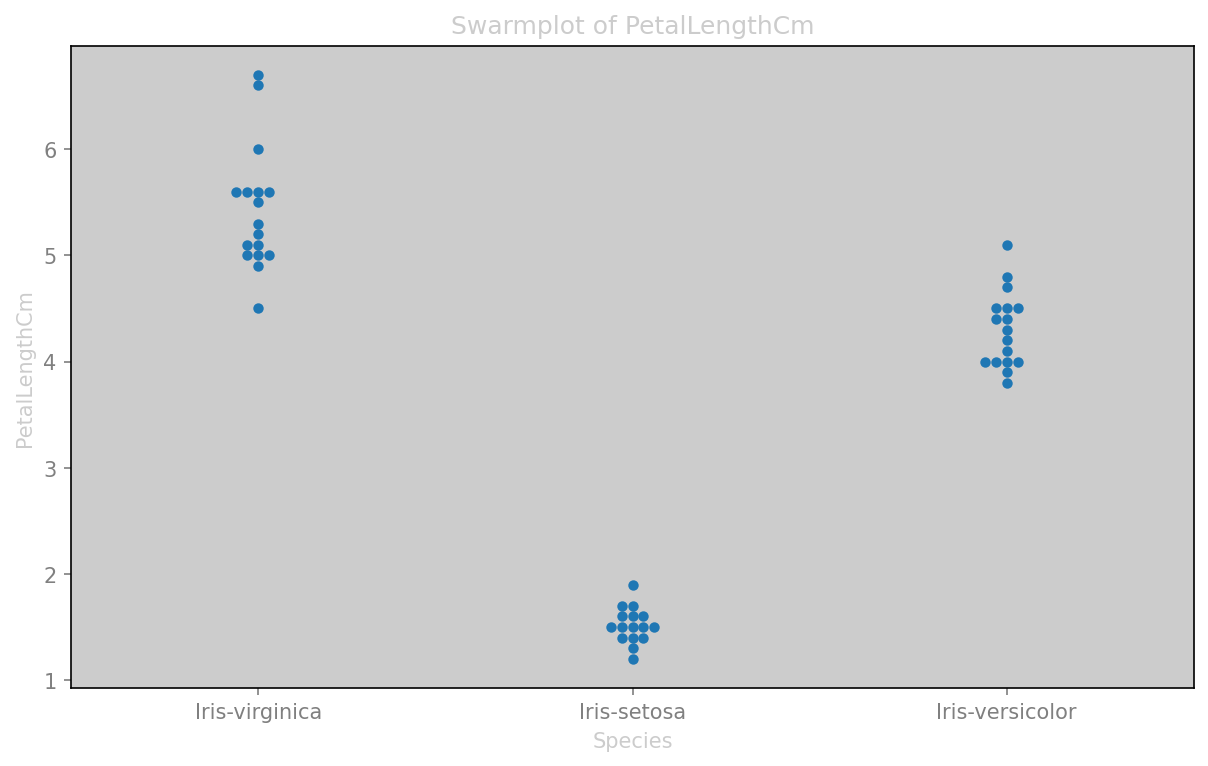

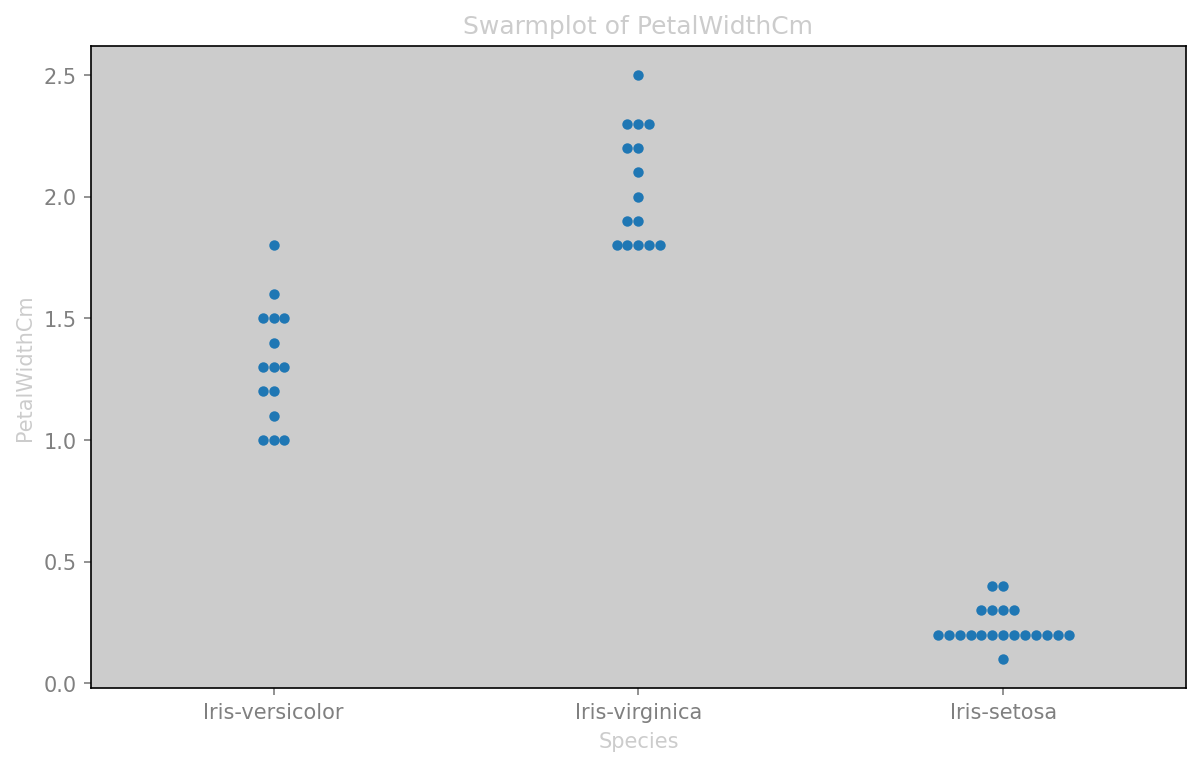

In [8]:
# Swarm Plot
sample_num = 50

for col in df:
    if col != "Species" and col != "Id":
        plt.figure(figsize=(6, 4))
        sns.swarmplot(x="Species", y=col, data=df.sample(sample_num))
        plt.title(f"Swarmplot of {col}")
        plt.tight_layout()
        plt.show()

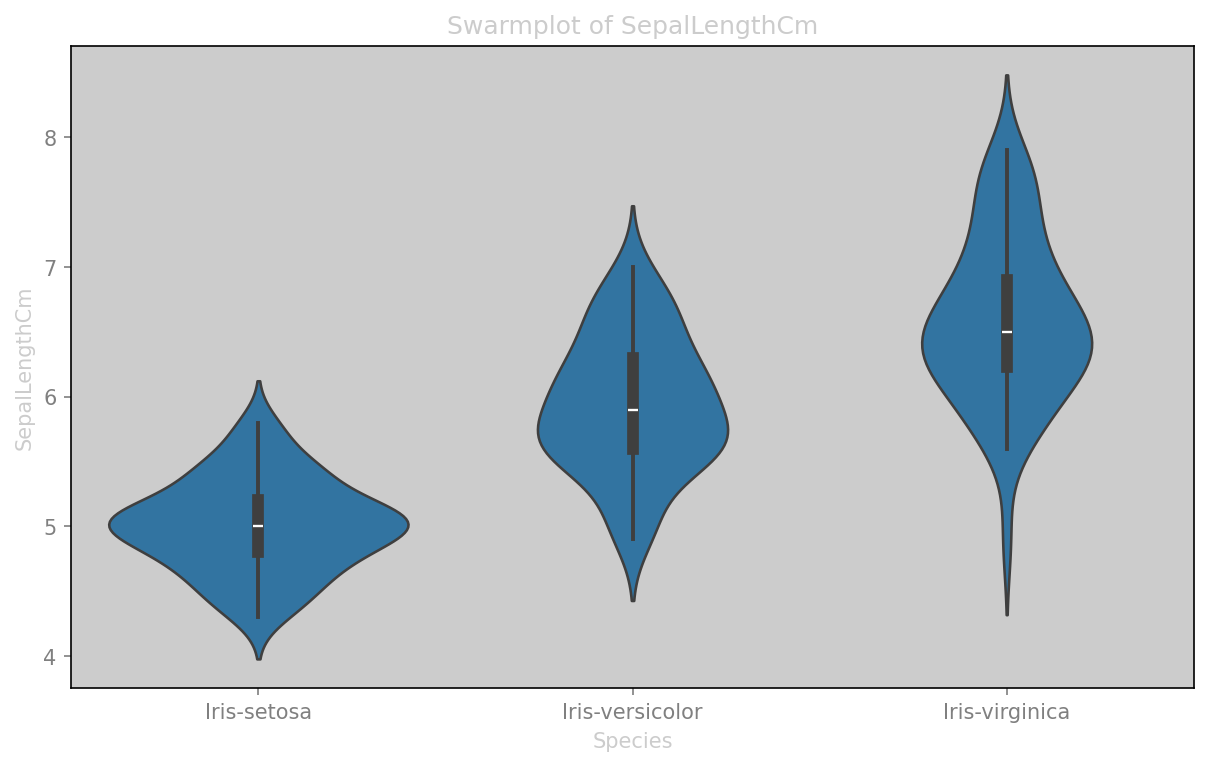

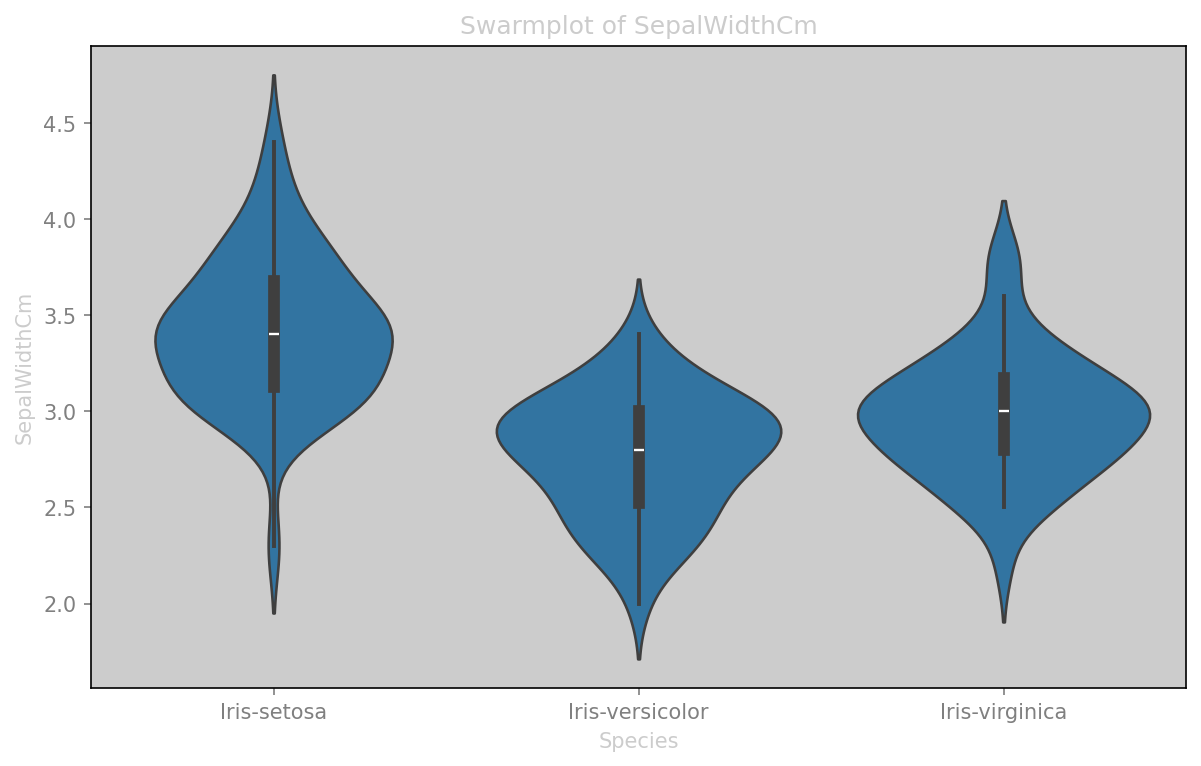

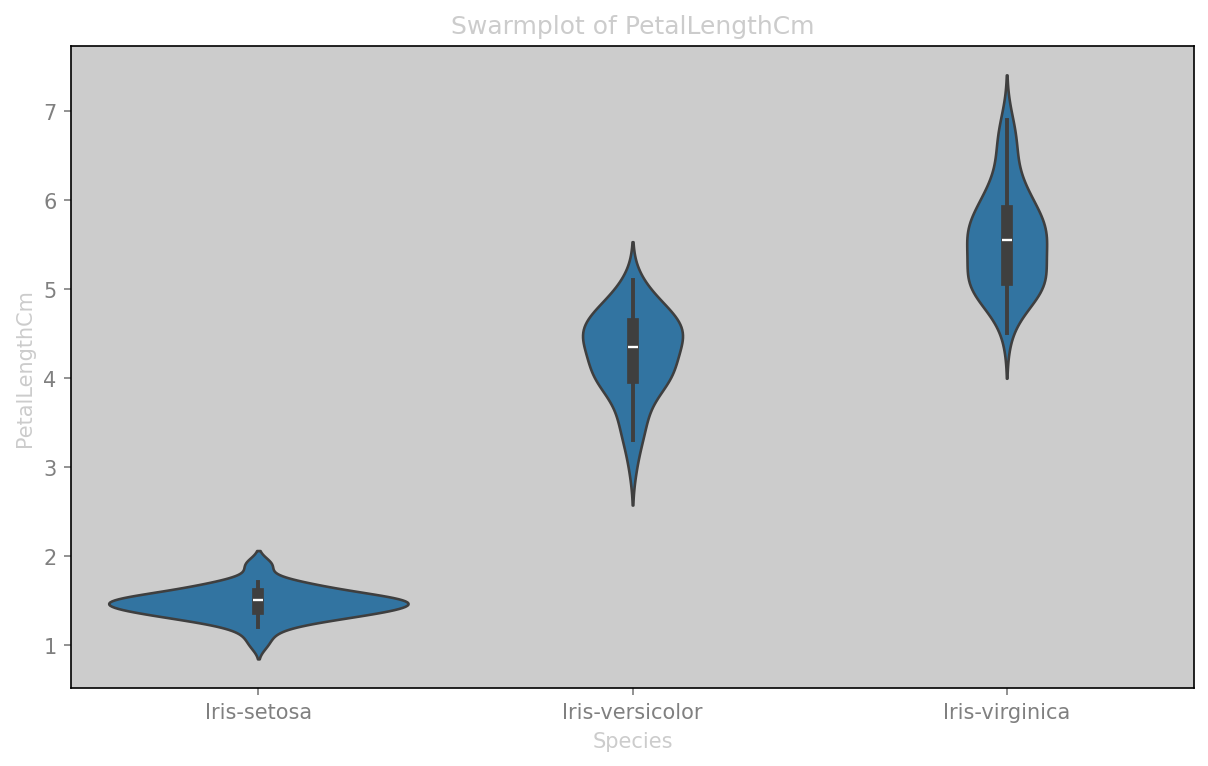

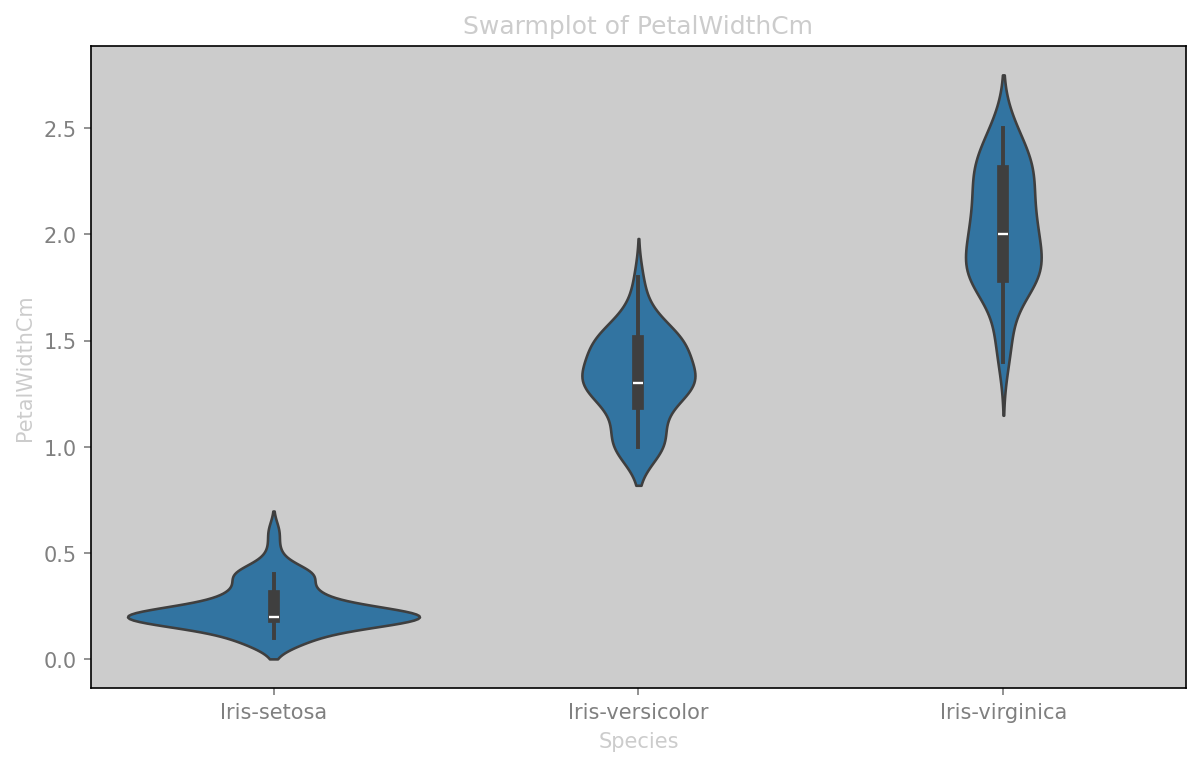

In [9]:
# Violin Plot
for col in df:
    if col != "Species" and col != "Id":
        plt.figure(figsize=(6, 4))
        sns.violinplot(x="Species", y=col, data=df)
        plt.title(f"Swarmplot of {col}")
        plt.tight_layout()
        plt.show()

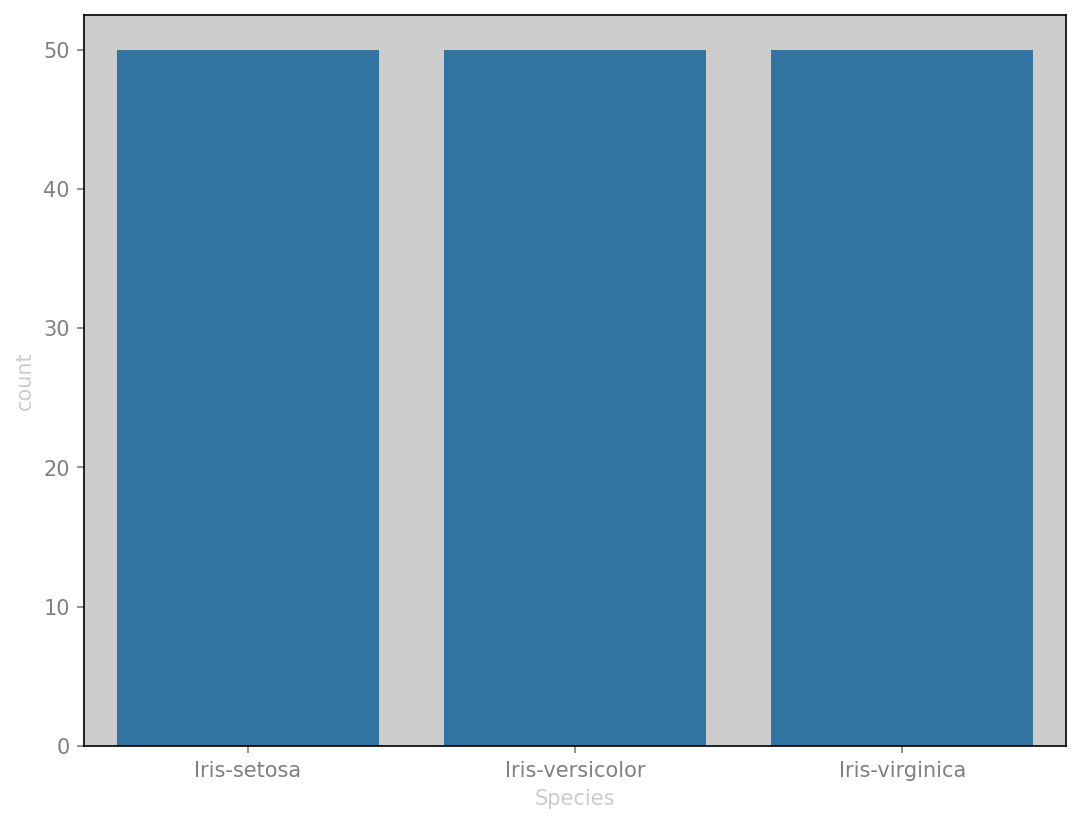

<Axes: xlabel='Species', ylabel='count'>

In [10]:
# Count Plot
sns.countplot(x="Species", data=df)

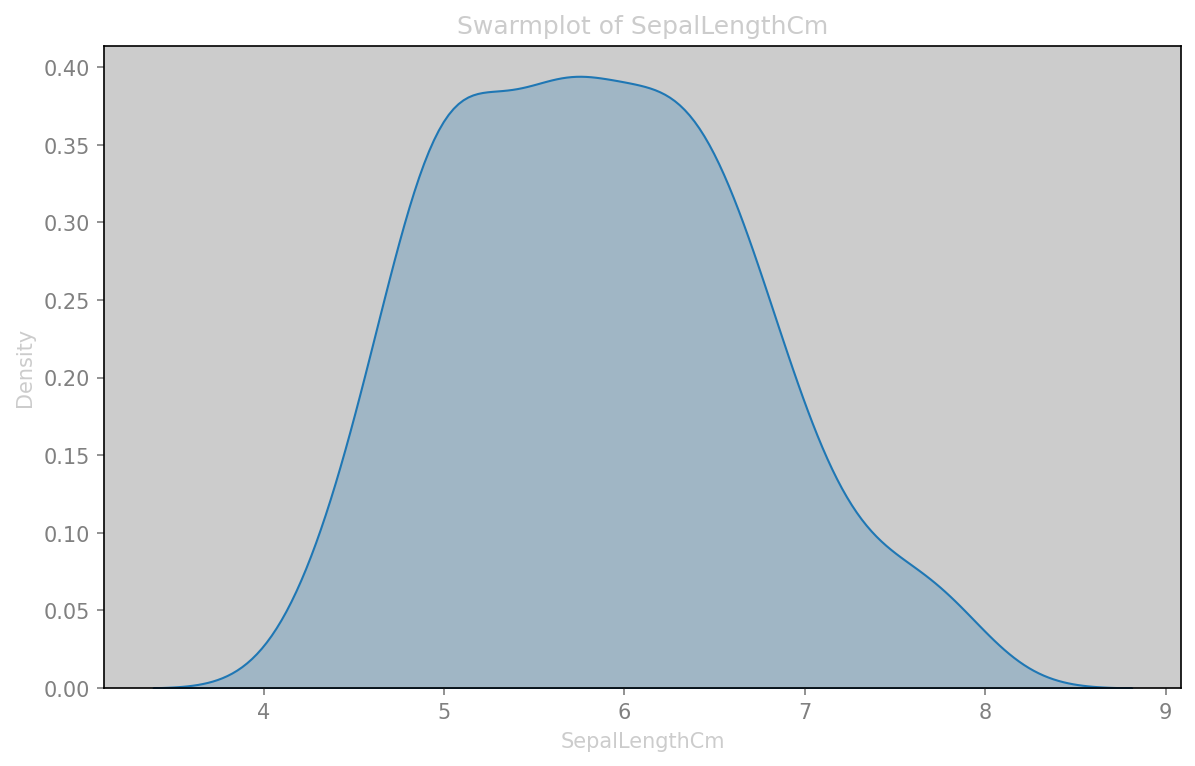

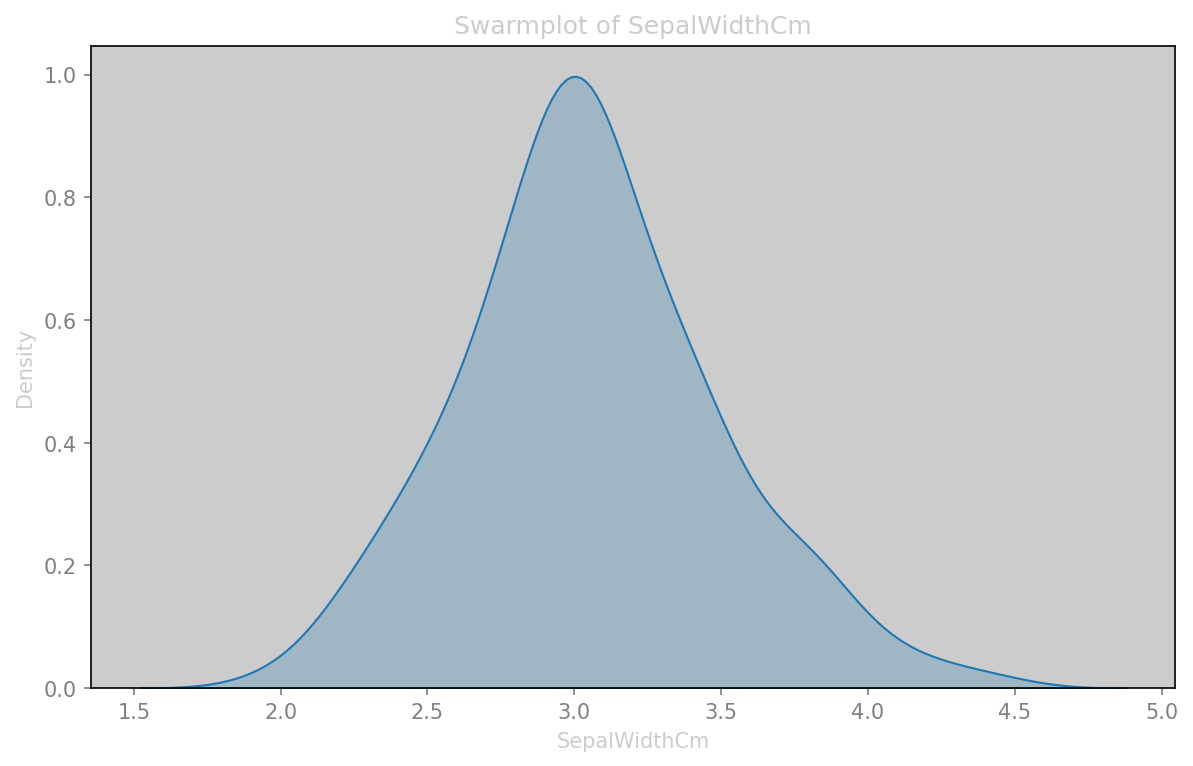

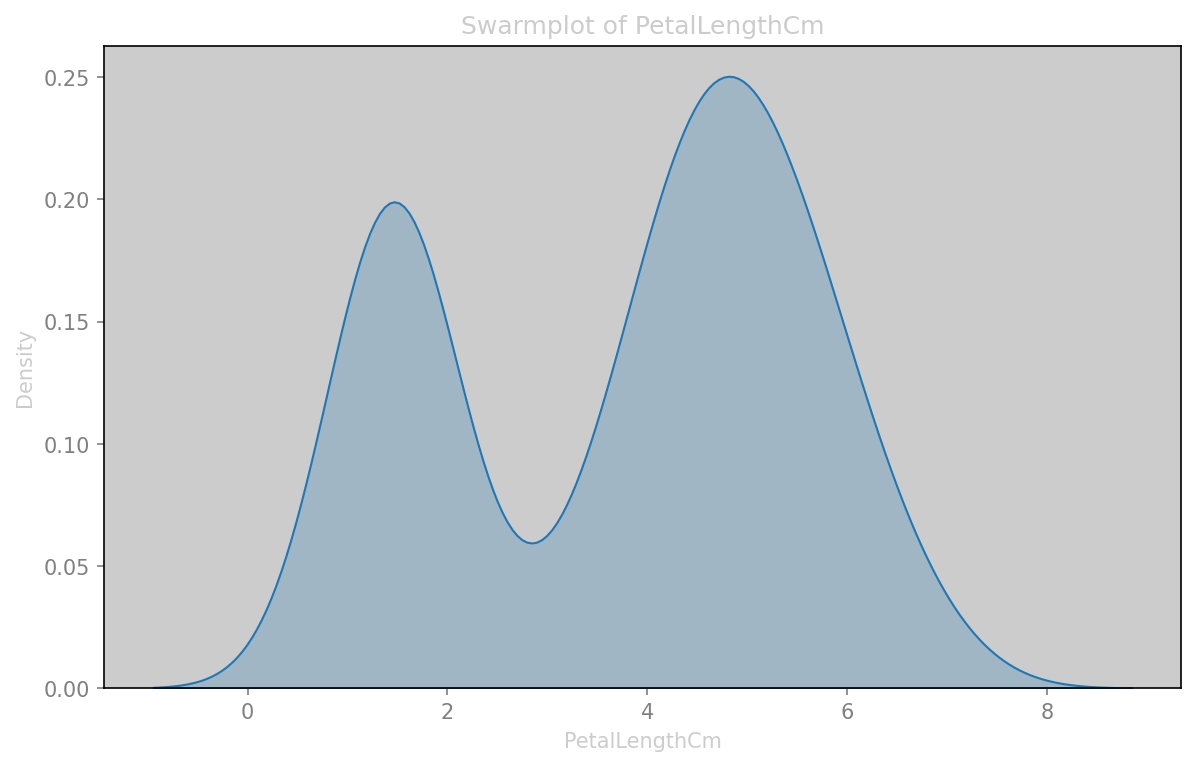

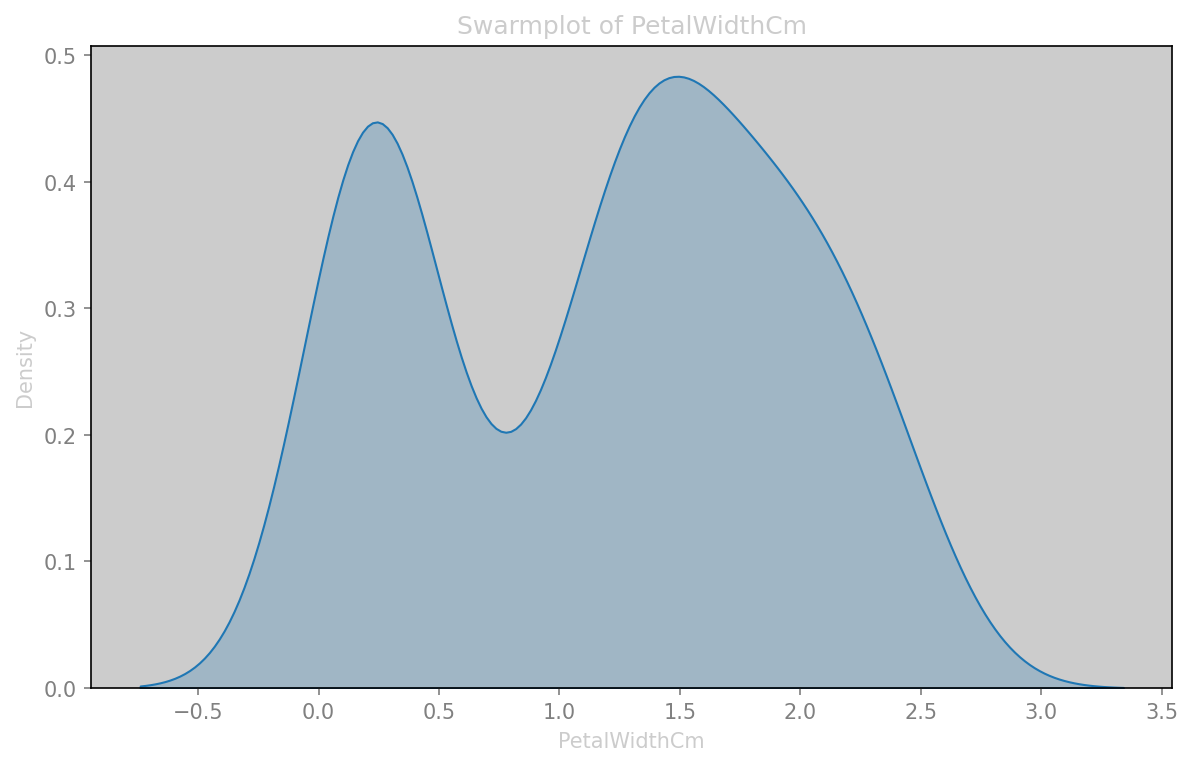

In [11]:
# Kernel Density Plot
for col in plot_df:
    if col != "Species" and col != "Id":
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=plot_df, x=col, label=col, fill=True)
        plt.title(f"Swarmplot of {col}")
        plt.tight_layout()
        plt.show()

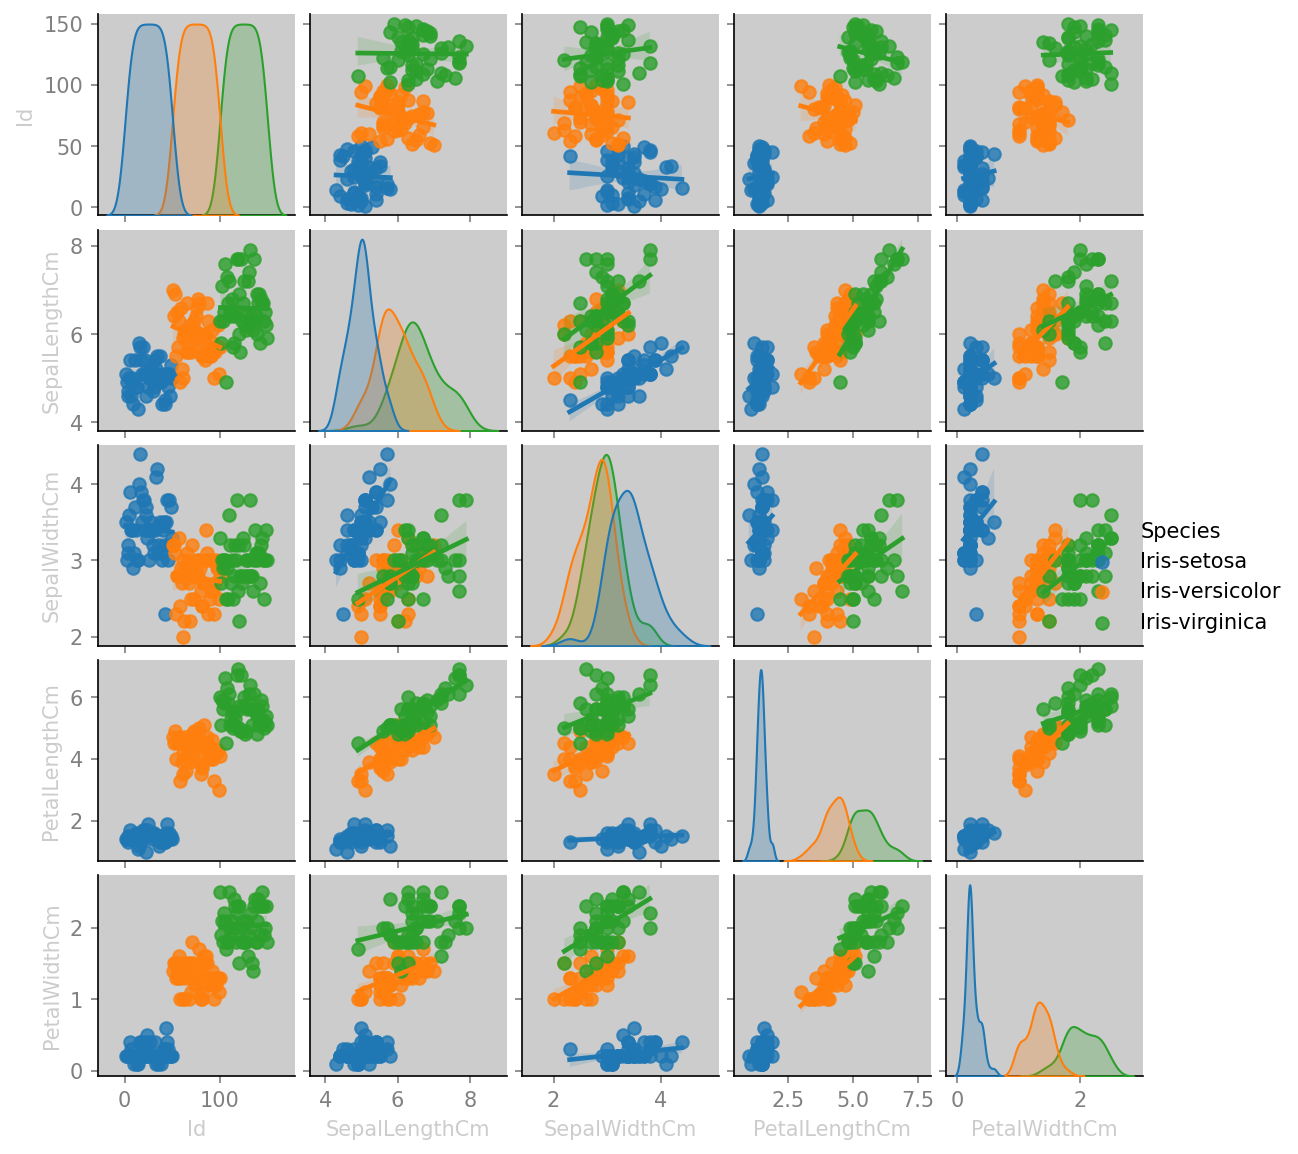

In [12]:
# Regression Line
sns.pairplot(df, kind="reg", hue="Species")
plt.show()

In [ ]:
le = LabelEncoder()

X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = le.fit_transform(df["Species"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 0.9333333333333333


In [14]:
# Logisitc Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "Classification Report:\n",
    classification_report(y_test, y_pred, target_names=le.classes_),
)

Accuracy: 0.9666666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [15]:
# Naive-Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "Classification Report:\n",
    classification_report(y_test, y_pred, target_names=le.classes_),
)

Accuracy: 0.9666666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [16]:
# Grid Search of RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [2, 3, 5, None],
    "min_samples_split": [2, 5, 10],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)
print("Best score (CV):", grid.best_score_)

Best parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best score (CV): 0.9666666666666668


In [17]:
# Random Forest
model = RandomForestClassifier(
    n_estimators=50, max_depth=3, min_samples_split=2, random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "Classification Report:\n",
    classification_report(y_test, y_pred, target_names=le.classes_),
)

Accuracy: 0.9666666666666667
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [18]:
# Grid Search of RandomForestClassifier

param_grid = {
    "learning_rate": [0.01, 0.1],
    "max_iter": [100, 200],
    "max_depth": [3, 5, None],
    "min_samples_leaf": [10, 20],
    "l2_regularization": [0, 1, 10],
    "max_leaf_nodes": [15, 31],
}
grid = GridSearchCV(
    HistGradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)
print("Best score (CV):", grid.best_score_)

Best parameters: {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 100, 'max_leaf_nodes': 15, 'min_samples_leaf': 10}
Best score (CV): 0.9666666666666668


In [19]:
# Gradient Boosted Trees
model = HistGradientBoostingClassifier(
    random_state=42,
    l2_regularization=0,
    learning_rate=0.1,
    max_depth=5,
    max_iter=100,
    max_leaf_nodes=15,
    min_samples_leaf=10,
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "Classification Report:\n",
    classification_report(y_test, y_pred, target_names=le.classes_),
)

Accuracy: 0.9
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



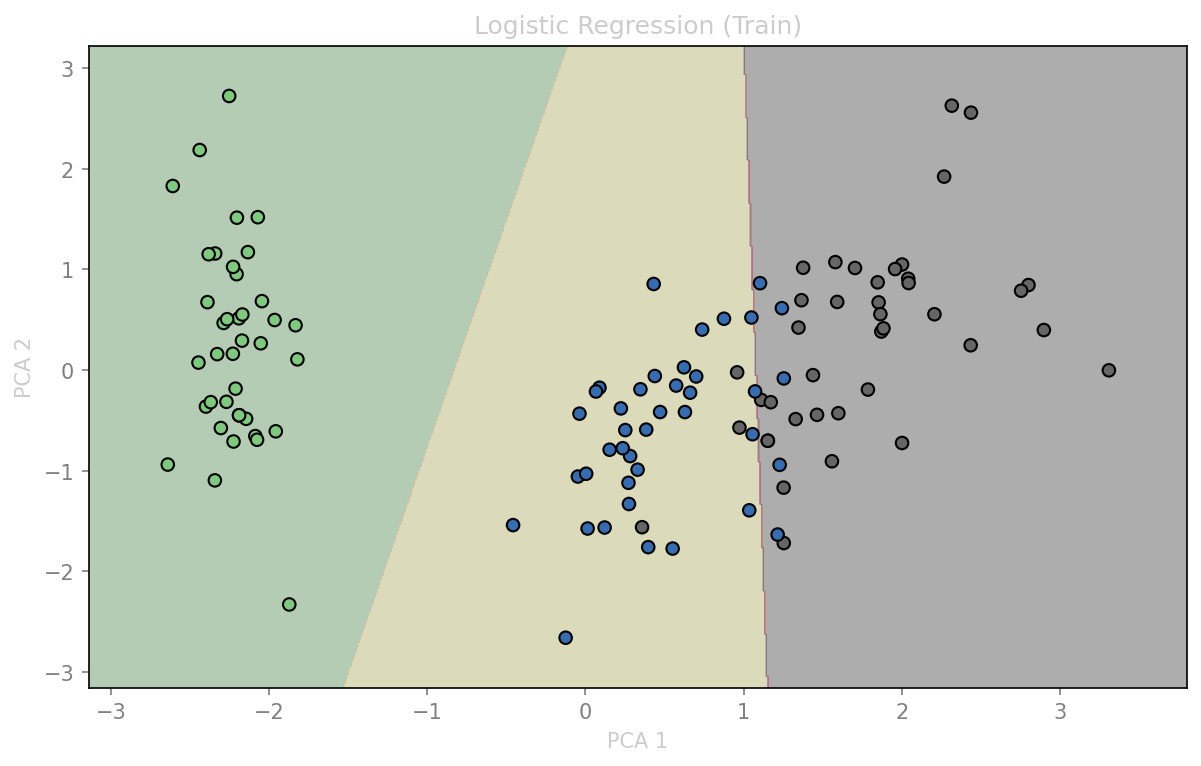

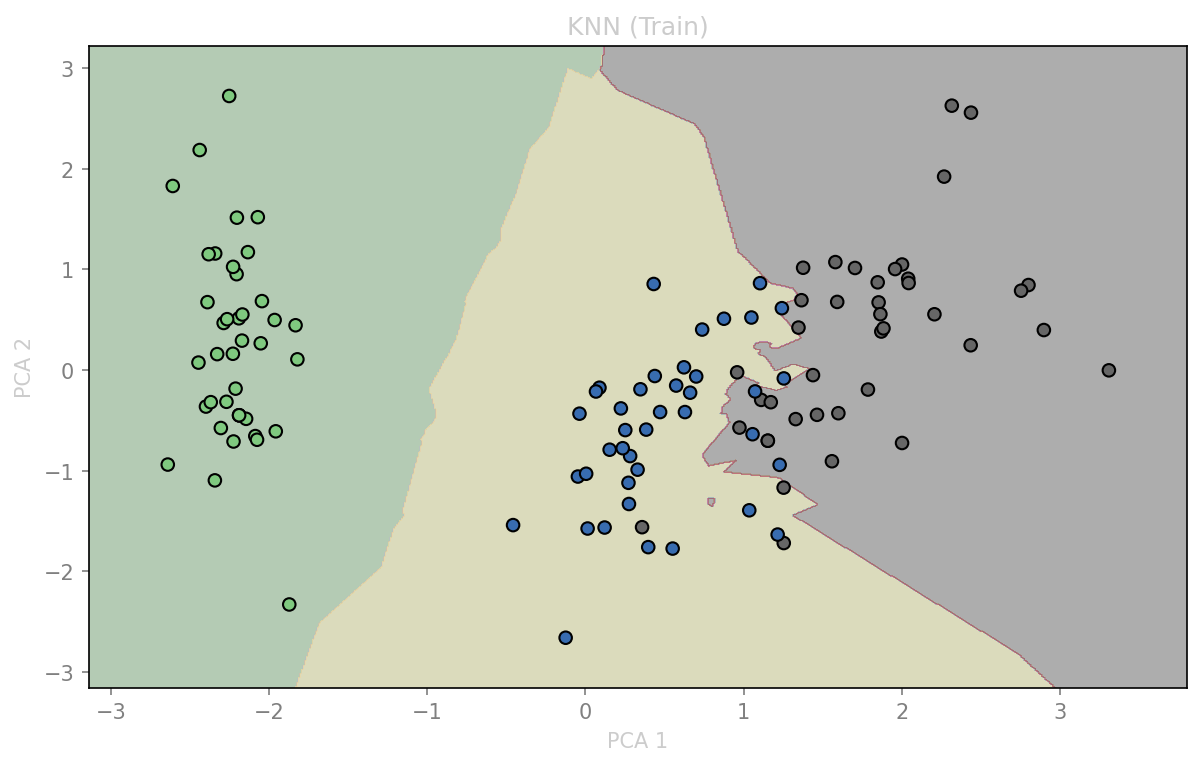

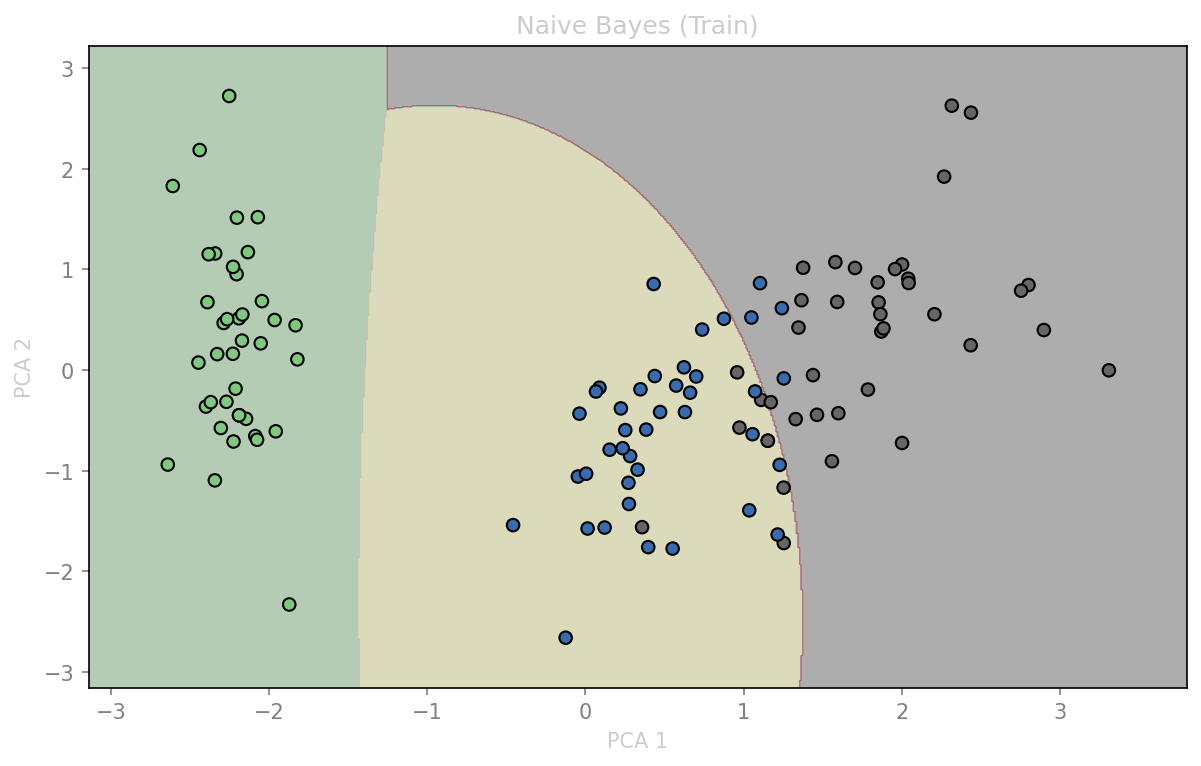

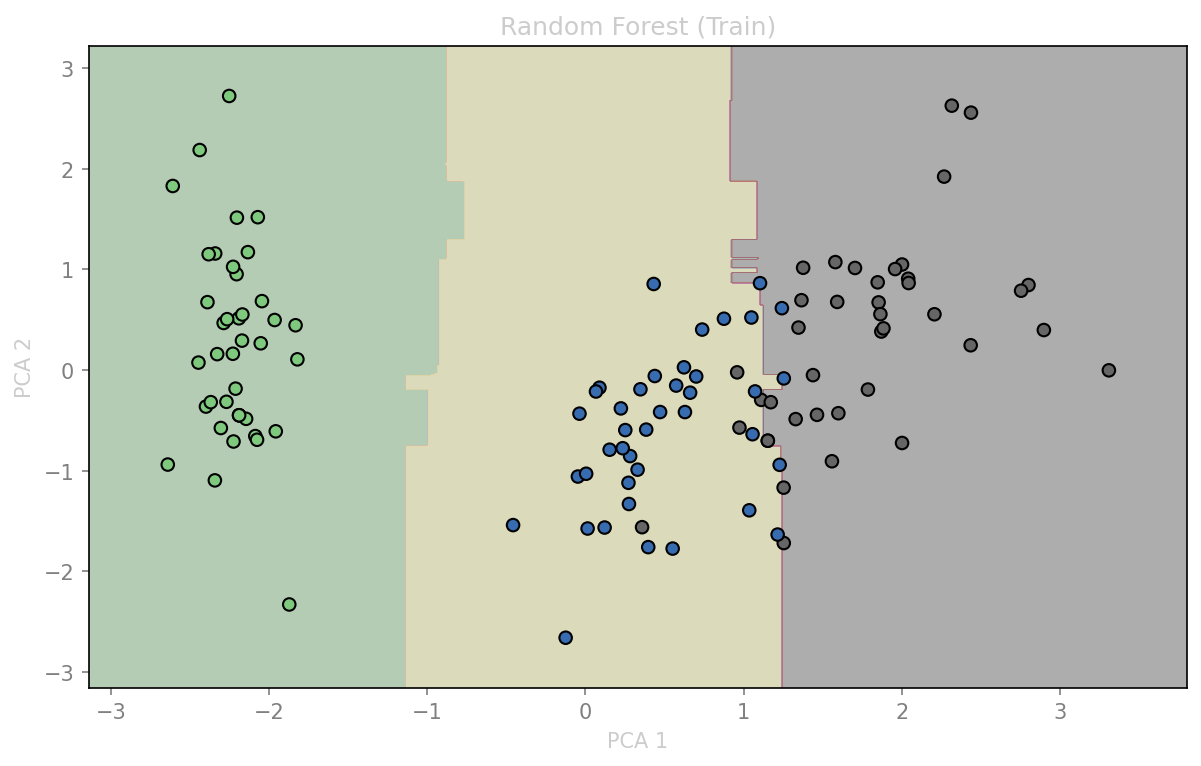

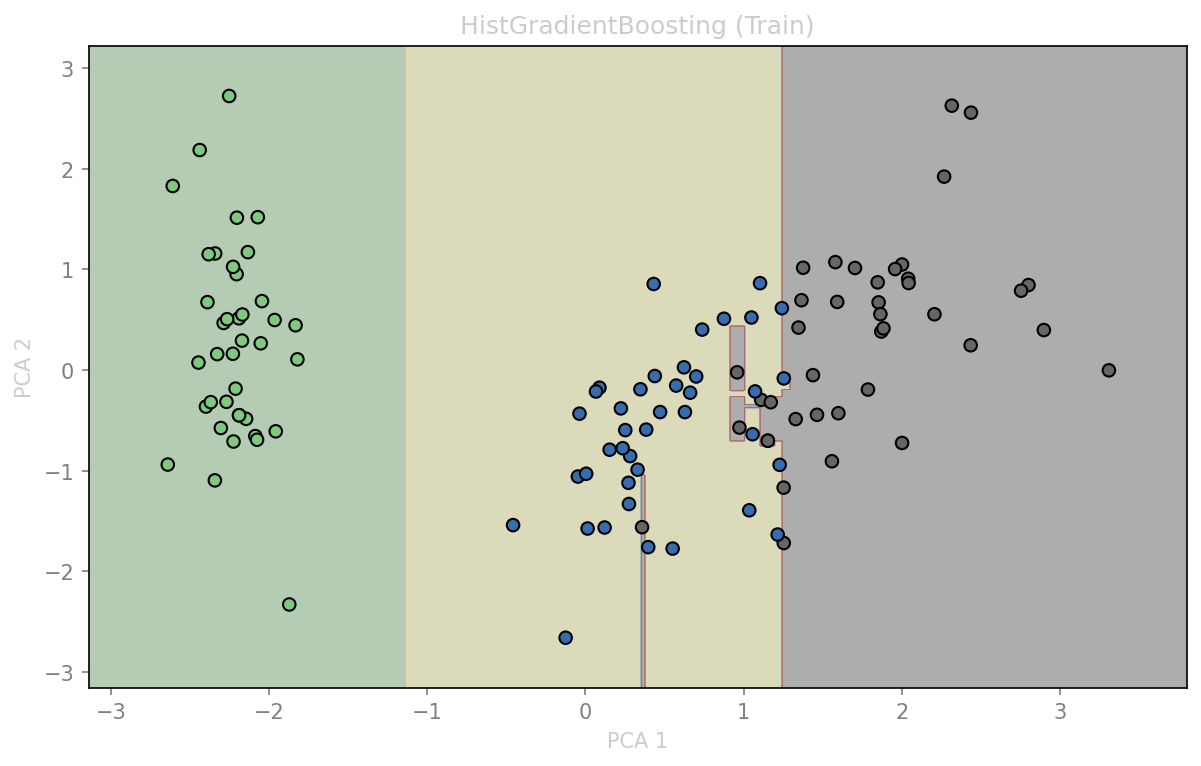

In [20]:
# Visualizing Results
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, stratify=y, test_size=0.2, random_state=42
)


def plot_decision_boundary(clf, X, y, title):
    h = 0.01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="Accent")
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent", edgecolor="k")
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.tight_layout()
    plt.show()


# Instantiate models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=50, max_depth=3, min_samples_split=2, random_state=42
    ),
    "HistGradientBoosting": HistGradientBoostingClassifier(
        random_state=42,
        l2_regularization=0,
        learning_rate=0.1,
        max_depth=5,
        max_iter=100,
        max_leaf_nodes=15,
        min_samples_leaf=10,
    ),
}

# Plot all
for name, model in models.items():
    plot_decision_boundary(model, X_train, y_train, title=f"{name} (Train)")